In [1]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# importing color palettes
palette_2 = sns.color_palette('Set1', 6)
palette_3 = sns.color_palette('BrBG')
palette_4 = sns.color_palette('CMRmap')
palette_5 = sns.color_palette('Paired', 6)
palette_6=sns.color_palette('tab10')
palette_7=sns.color_palette('hls',8)

In [2]:
# Importing Dataset
df_ori=pd.read_csv(r'data (1).csv')
df=df_ori.copy() # Creating an original copy

### Data Cleaning

In [3]:
## Missing and unique elements and dropping Id column
missing=df.isnull().sum()*100/len(df)
df_dict = dict(zip([i for i in df.columns] , [pd.DataFrame(df[i].unique(), columns=[i]) for i in df.columns]))
unique=df.nunique()
df.drop(['Id'],1,inplace=True)       

##Check True and False count
check=df['Customer service calls'].value_counts()

### Hypothesis

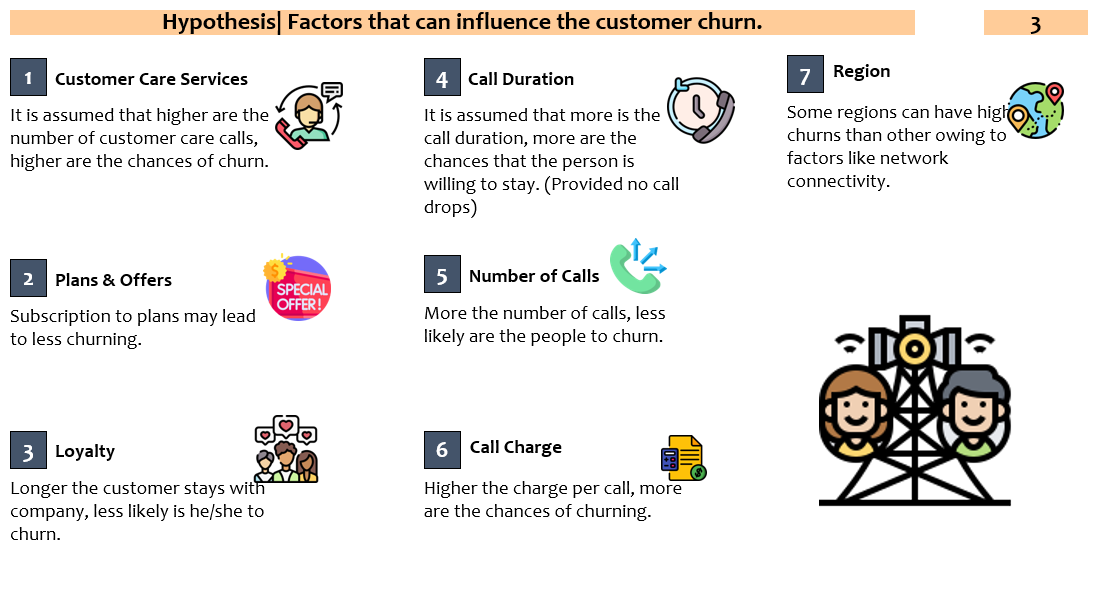

### EDA

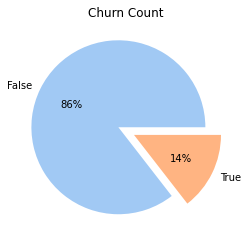

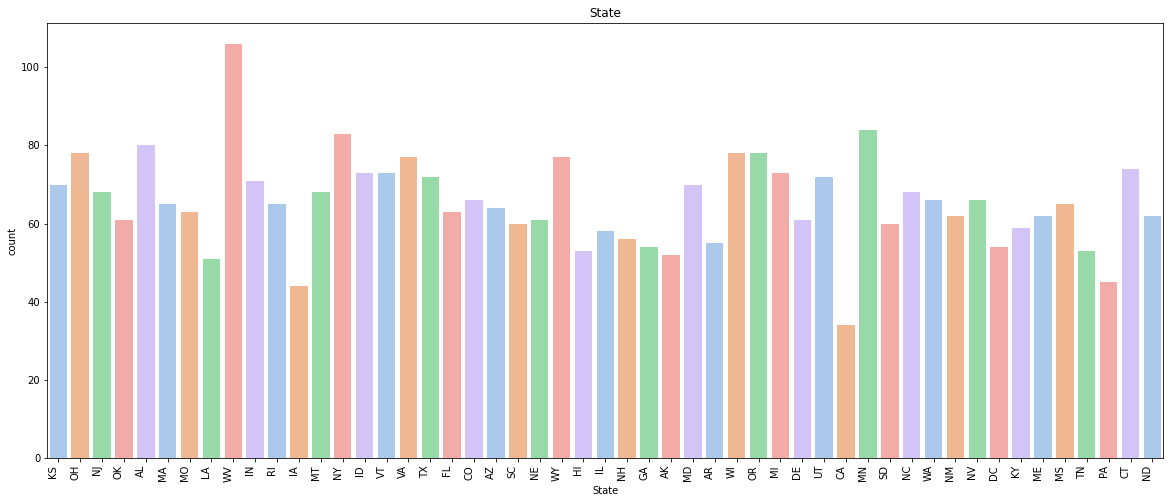

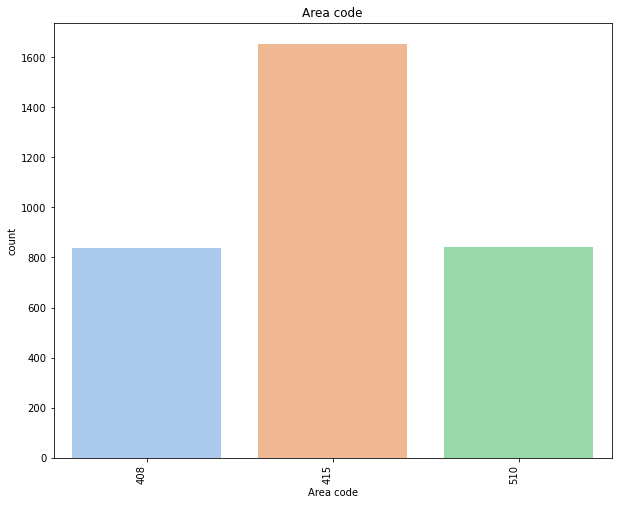

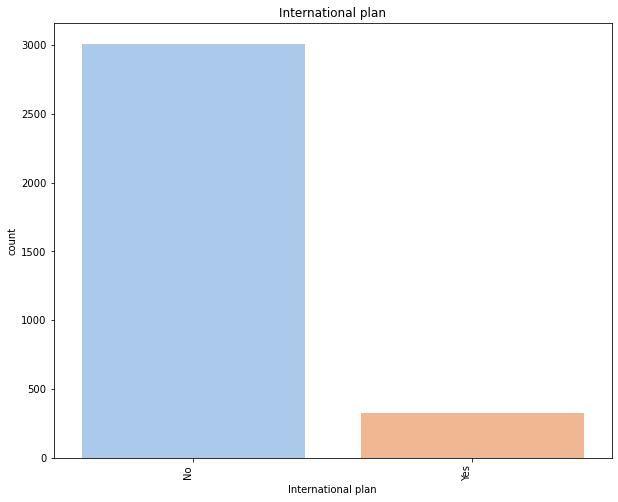

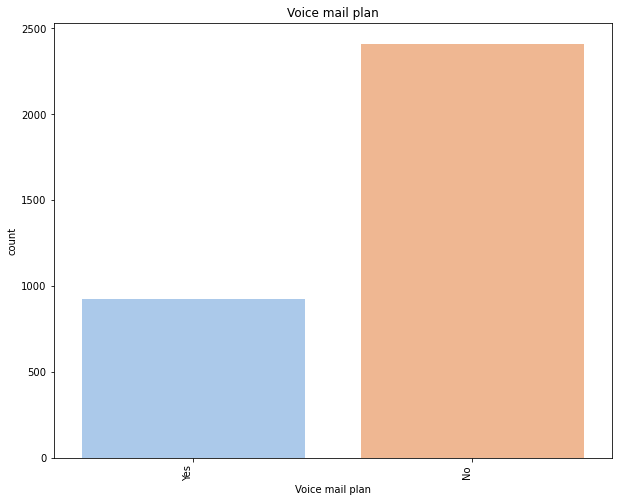

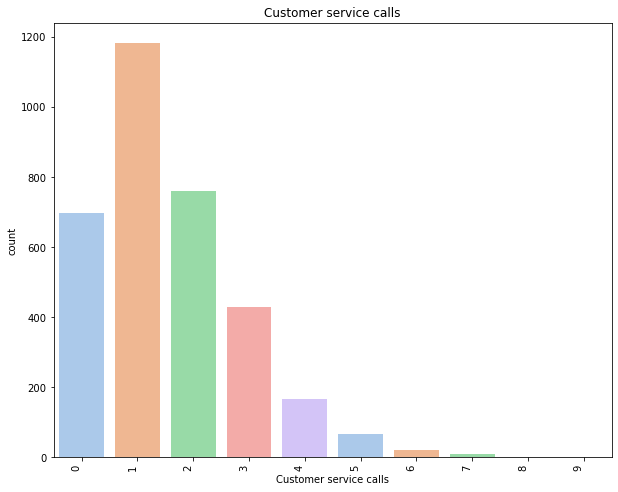

In [4]:
### EDA
# Univariate
color=sns.color_palette('pastel')[0:5]
color1=sns.color_palette('colorblind')[0:7]

plt.pie(df['Churn'].value_counts(),labels=['False','True'],colors=color,autopct='%.0f%%',explode=[0.1,0.1])
plt.title('Churn Count')
#plt.legend(loc='best')
plt.show()

var=['State','Area code','International plan','Voice mail plan','Customer service calls']
for i in var:
    if(df[i].nunique()>10):
        plt.figure(figsize=(20,8))
        chart=sns.countplot(df[i],palette=color)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90,horizontalalignment='right')
        plt.title(i)
        plt.show()
    else:
        plt.figure(figsize=(10,8))
        chart=sns.countplot(df[i],palette=color)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90,horizontalalignment='right')
        plt.title(i)
        plt.show()
        

In [5]:
#Creating a new data frame which contains the interval terms but not original values
df1=df.copy()
df2=df.copy()

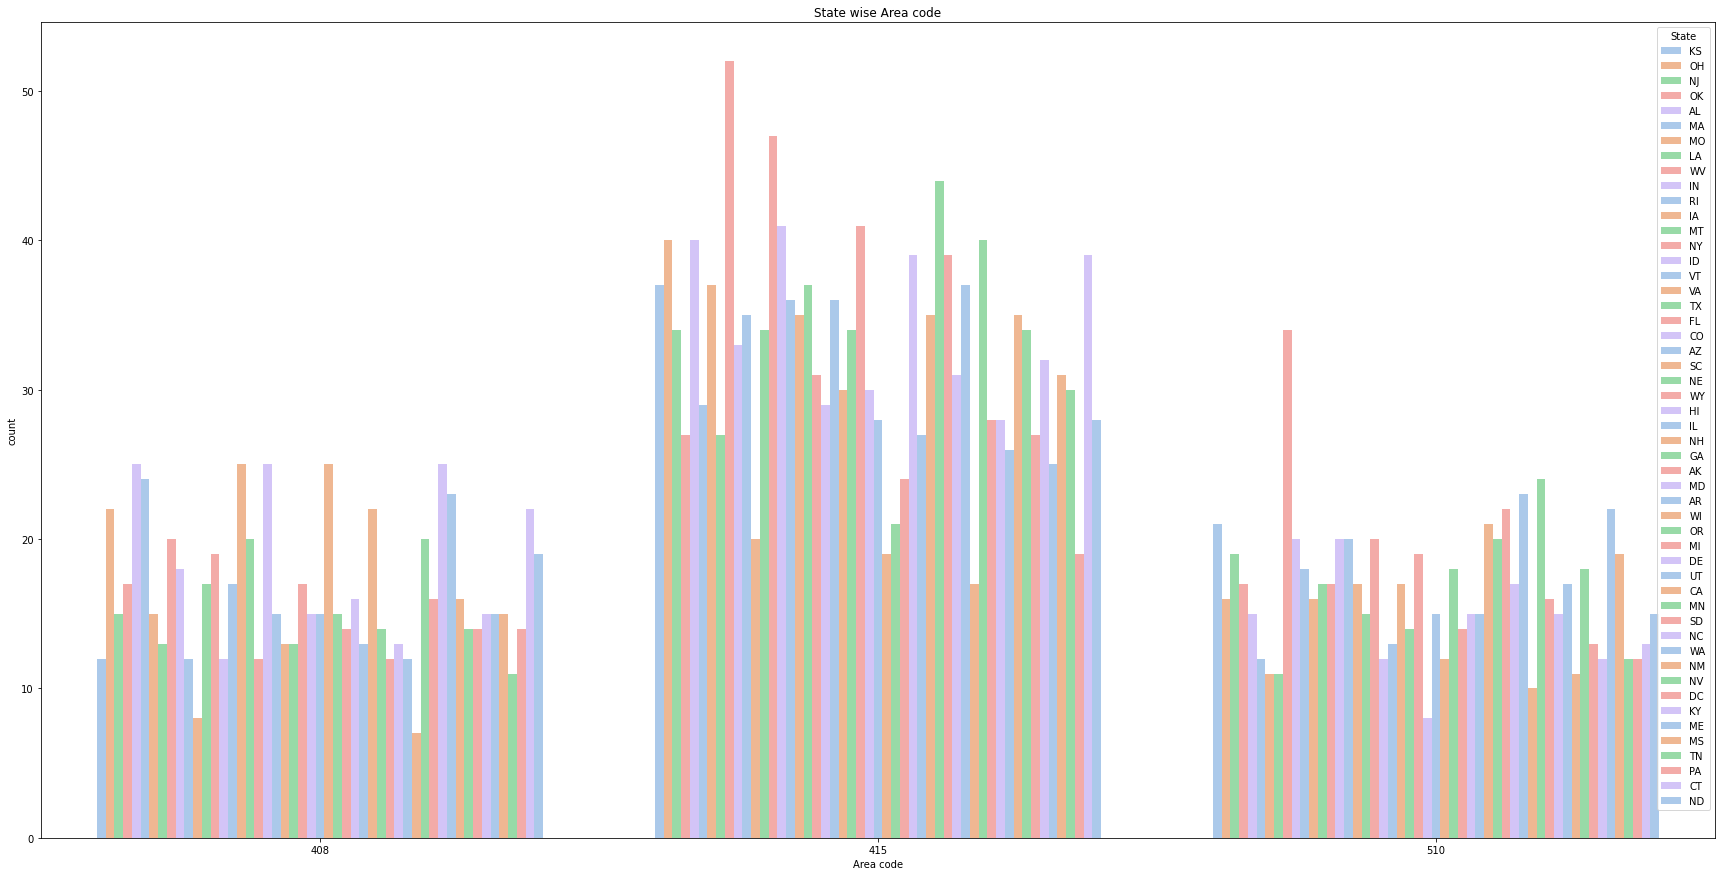

In [6]:
########## Creating intervals using pd.cut 
""" It provides with equal height interval but results in cases where thee might be no frequecies"""
""" Thus Using pd.qcut, which will provide with intervals with min 5% value per interval. Though unequal intervals will be there. """
TDC=[0,40,80,120,500]
labels=['0-40','40-80','80-120','120+']
df2['Daycall']=pd.cut(df2['Total day calls'],TDC,labels=labels)

TDCh=[0,15,30,45,60]
labels=['0-15','15-30','30-45','45+']
df2['Daycharge']=pd.cut(df2['Total day charge'],TDCh,labels=labels)

TDM=[0,45,90,135,500]
labels=['0-45','45-90','90-135','135+']
df2['DayMin']=pd.cut(df2['Total day minutes'],TDM,labels=labels)

TEC=[0,40,80,120,500]
labels=['0-40','40-80','80-120','120+']
df2['Evecall']=pd.cut(df2['Total eve calls'],TEC,labels=labels)

TECh=[0,7,14,21,35]
labels=['0-7','7-14','14-21','21+']
df2['Evecharge']=pd.cut(df2['Total eve charge'],TECh,labels=labels)

TEM=[0,45,90,135,500]
labels=['0-45','45-90','90-135','135+']
df2['EveMin']=pd.cut(df2['Total eve minutes'],TEM,labels=labels)

TNC=[0,50,100,150,200]
labels=['0-50','50-100','100-150','150-200']
df2['Nightcall']=pd.cut(df2['Total night calls'],TNC,labels=labels)

TNCh=[0,5,10,15,20]
labels=['0-5','5-10','10-15','15-20']
df2['Nightcharge']=pd.cut(df2['Total night charge'],TNCh,labels=labels)

TNM=[0,100,200,300,500]
labels=['0-45','45-90','90-135','135+']
df2['NightMin']=pd.cut(df2['Total night minutes'],TNM,labels=labels)

TIC=[0,5,10,15,20]
labels=['0-5','5-10','10-15','15-20']
df2['Intcall']=pd.cut(df2['Total intl calls'],TIC,labels=labels)

TICh=[0,1.5,3,4.5,6]
labels=['0-1.5','1.5-3','3-4.5','4.5-6']
df2['Intcharge']=pd.cut(df2['Total intl charge'],TICh,labels=labels)

TIM=[0,5,10,15,20]
labels=['0-5','5-10','10-15','15-20']
df2['IntMin']=pd.cut(df2['Total intl minutes'],TIM,labels=labels)

AL=[0,64,128,192,256]
labels=['0-64','64-128','128-192','192-256']
df2['AccLen']=pd.cut(df2['Account length'],AL,labels=labels)

VMM=[0,15,30,45,60]
labels=['0-15','15-30','30-45','45+']
df2['Vmail']=pd.cut(df2['Number vmail messages'],VMM,labels=labels)

df2['Total charge']=df['Total day charge']+df['Total eve charge']+df['Total night charge']
df2['Total Min']=df['Total day minutes']+df['Total eve minutes']+df['Total night minutes']
df2['Total Number']=df['Total day calls']+df['Total eve calls']+df['Total night calls']


TCh=[0,25,50,75,100]
labels=['0-25','25-50','50-75','75-100']
df2['Total Charge']=pd.cut(df2['Total charge'],TCh,labels=labels)

TC=[175,225,275,325,375,425]
labels=['175-225','225-275','275-325','325-375','375-425']
df2['Total Calls']=pd.cut(df2['Total Number'],TC,labels=labels)

TM=[250,450,650,850,1000]
labels=['250-450','450-650','650-850','850+']
df2['Total Minutes']=pd.cut(df2['Total Min'],TM,labels=labels)


df2.drop(['Number vmail messages','Account length','Total intl minutes','Total intl charge','Total intl calls',
          'Total night minutes','Total night charge','Total night calls',
          'Total eve minutes','Total eve charge','Total eve calls',
          'Total day minutes','Total day charge','Total day calls'],1,inplace=True)
        

plt.figure(figsize=(30,15))     
sns.countplot(df['Area code'], hue=df['State'], palette=color)
plt.title('State wise Area code')  
plt.show() 

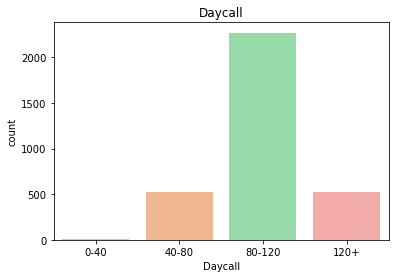

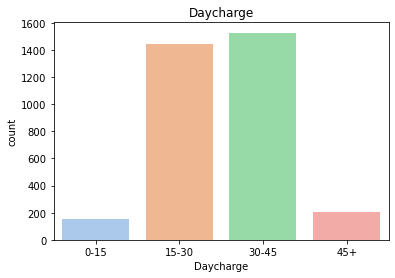

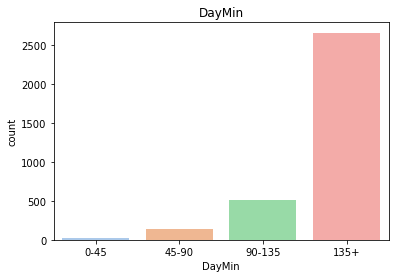

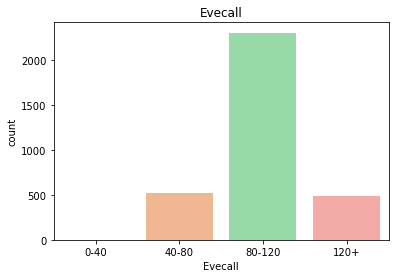

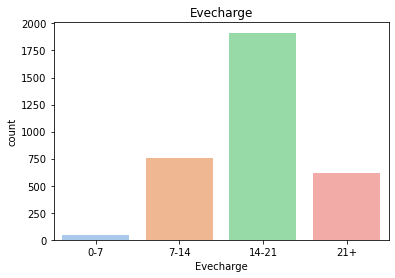

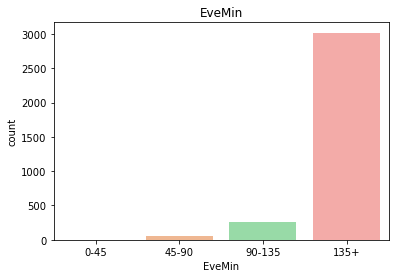

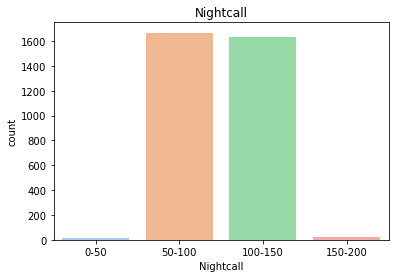

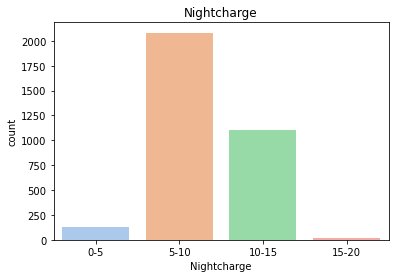

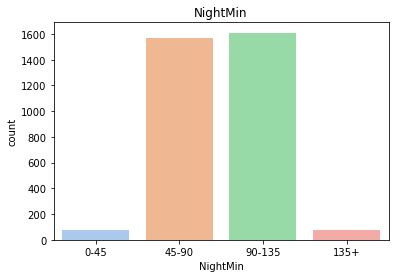

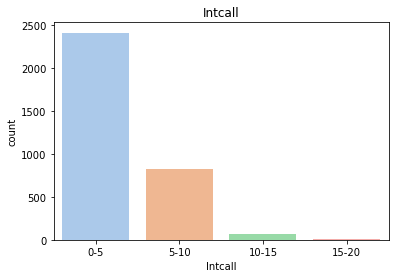

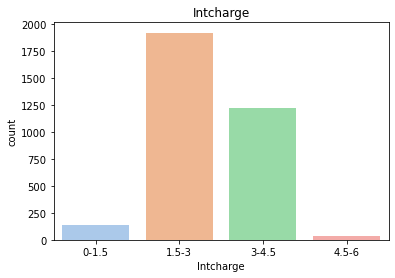

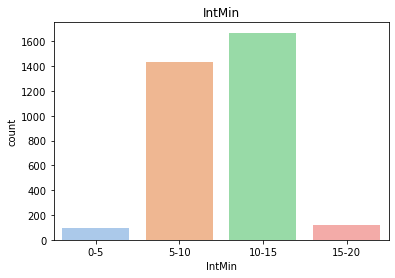

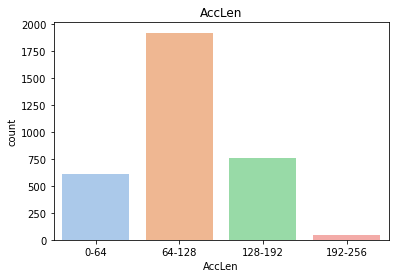

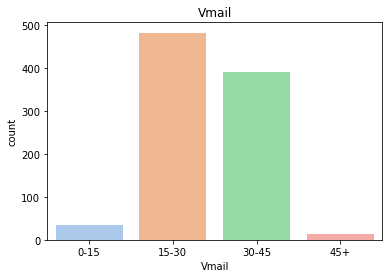

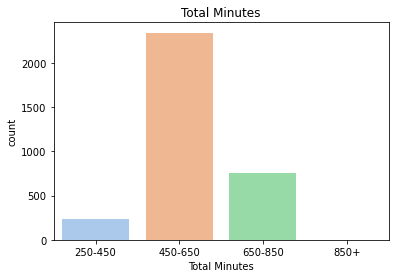

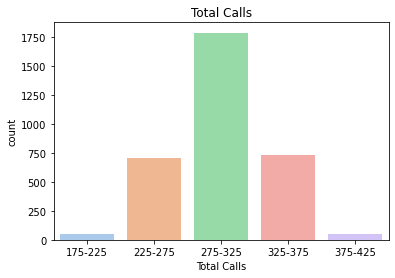

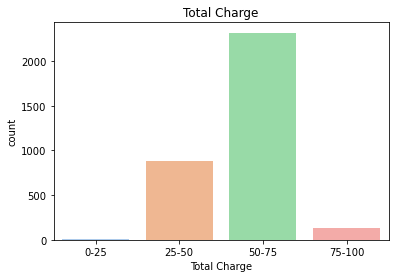

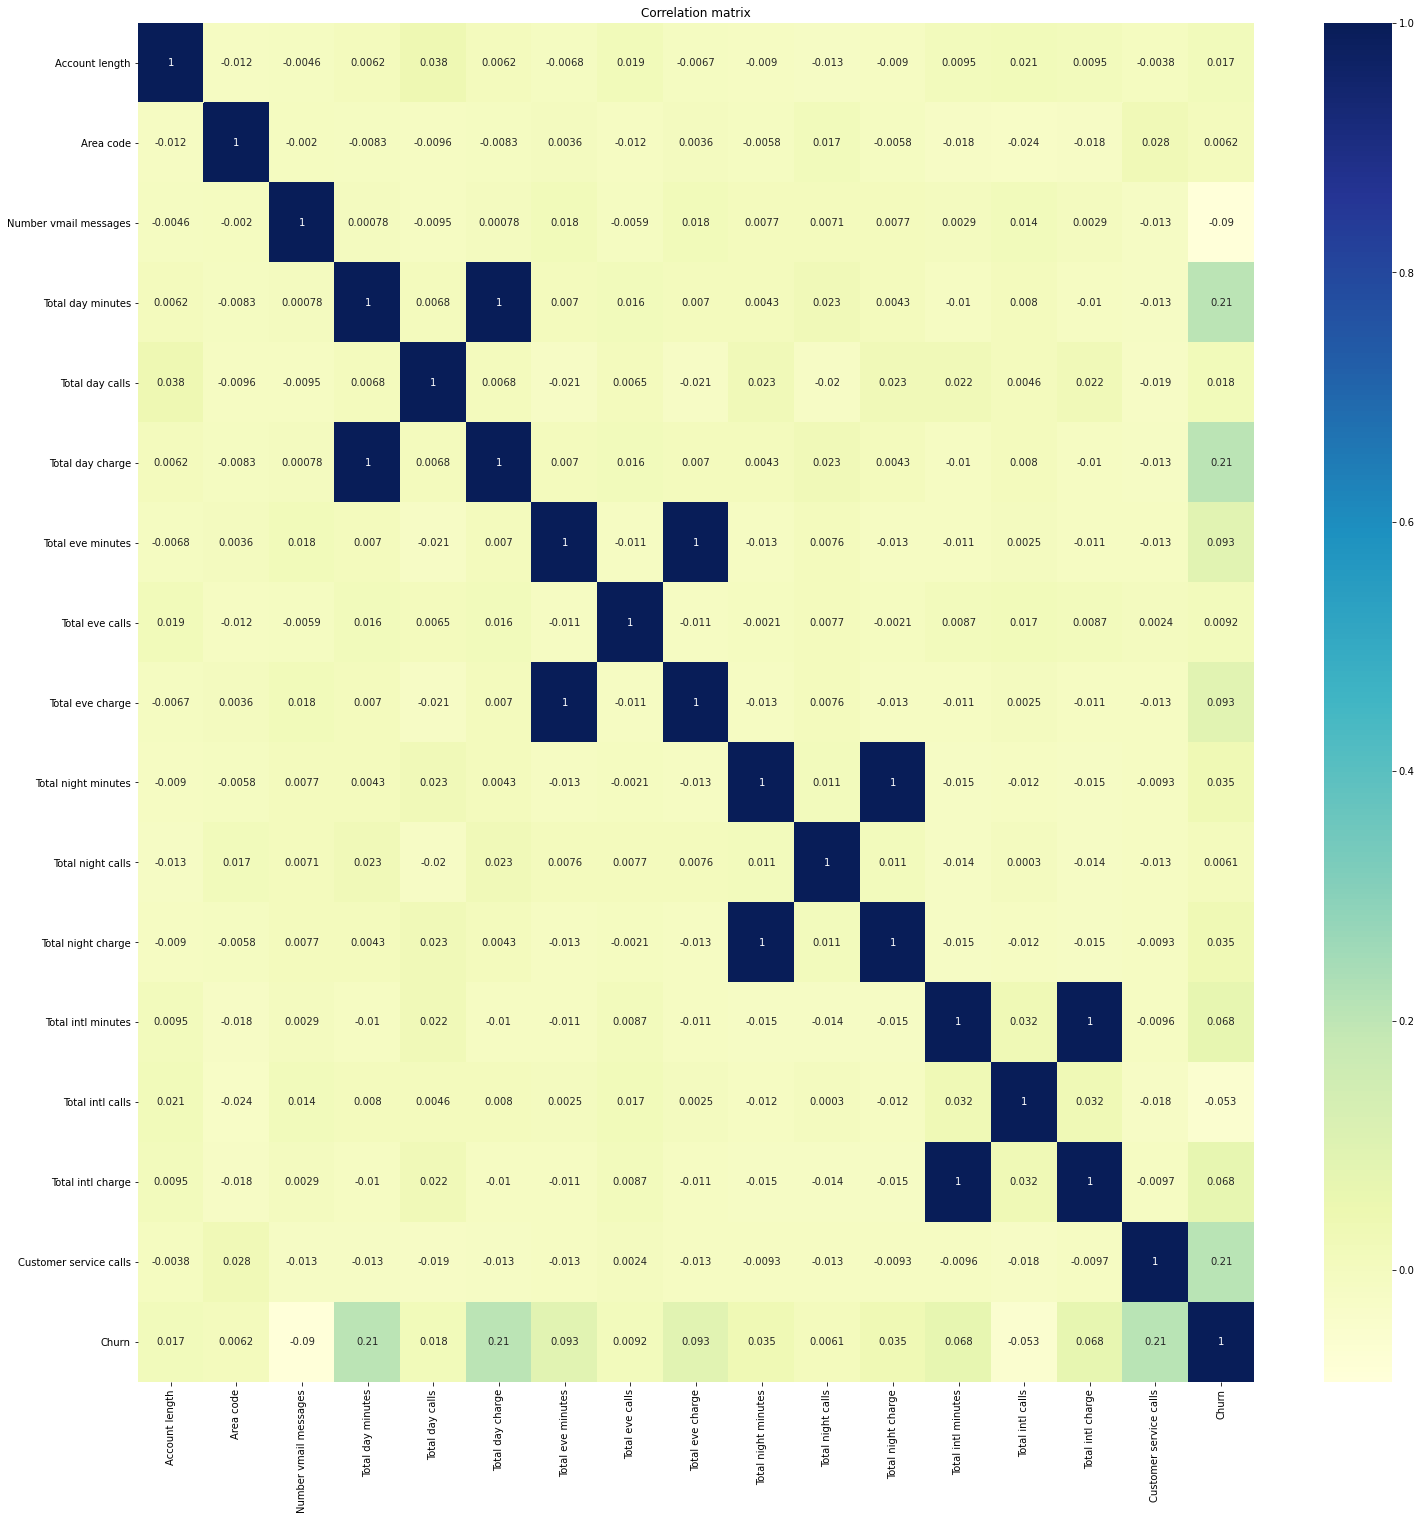

<Figure size 1800x576 with 0 Axes>

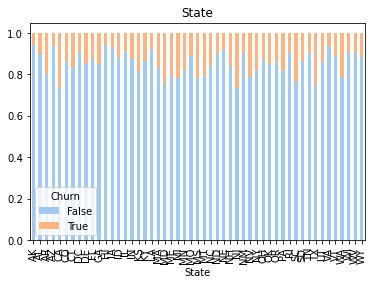

<Figure size 720x576 with 0 Axes>

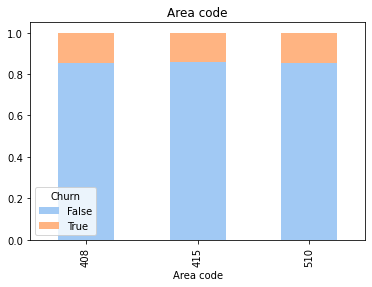

<Figure size 720x576 with 0 Axes>

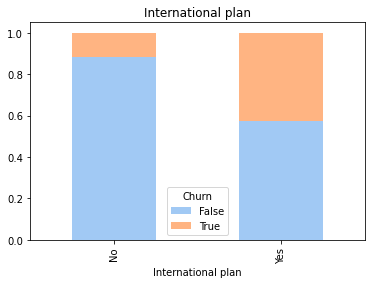

<Figure size 720x576 with 0 Axes>

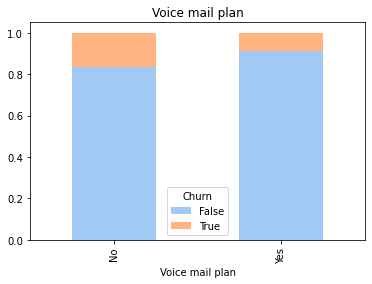

<Figure size 720x576 with 0 Axes>

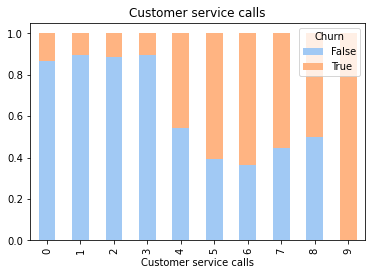

<Figure size 720x576 with 0 Axes>

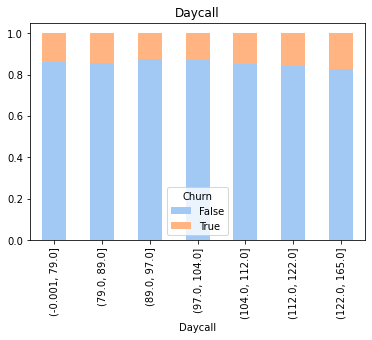

<Figure size 720x576 with 0 Axes>

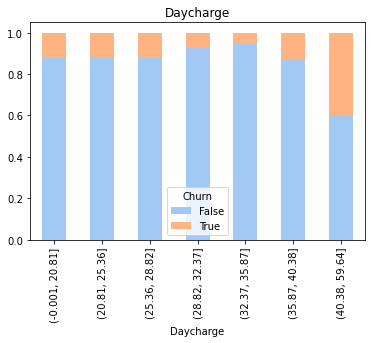

<Figure size 720x576 with 0 Axes>

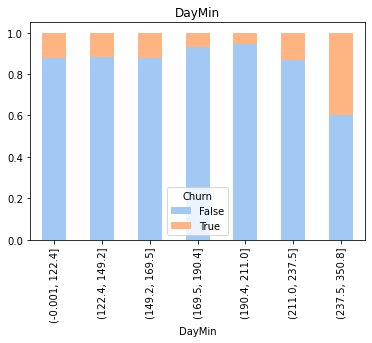

<Figure size 720x576 with 0 Axes>

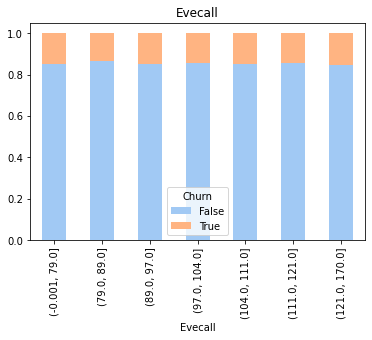

<Figure size 720x576 with 0 Axes>

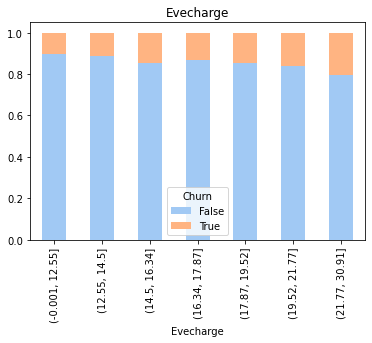

<Figure size 720x576 with 0 Axes>

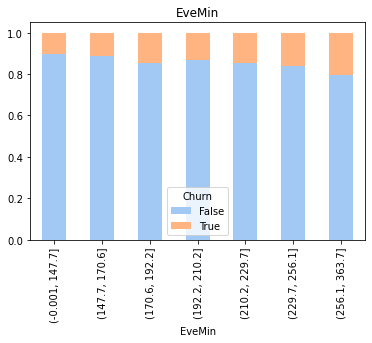

<Figure size 720x576 with 0 Axes>

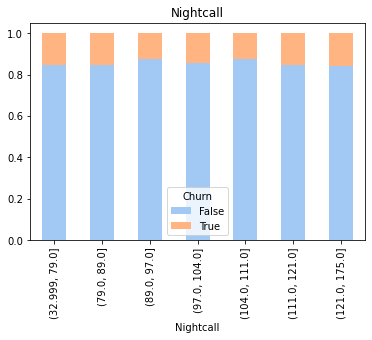

<Figure size 720x576 with 0 Axes>

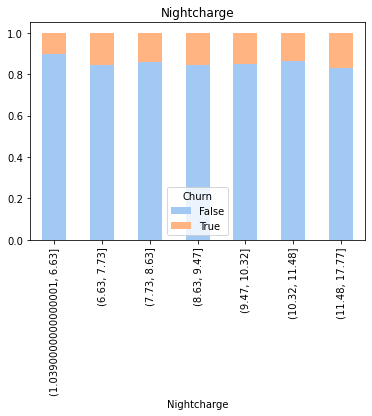

<Figure size 720x576 with 0 Axes>

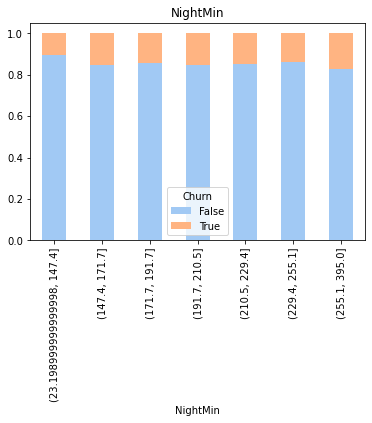

<Figure size 720x576 with 0 Axes>

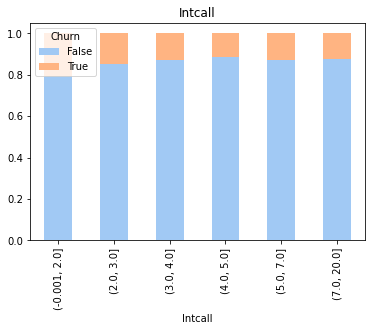

<Figure size 720x576 with 0 Axes>

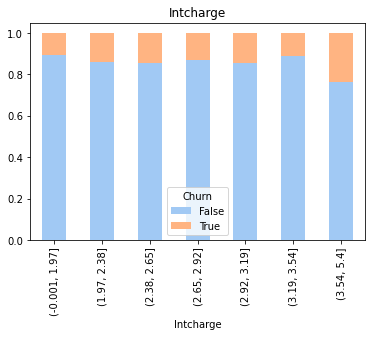

<Figure size 720x576 with 0 Axes>

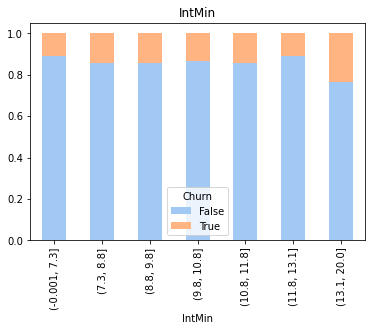

<Figure size 720x576 with 0 Axes>

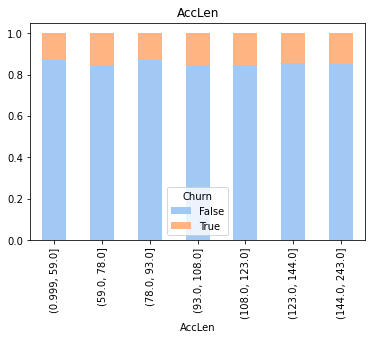

<Figure size 720x576 with 0 Axes>

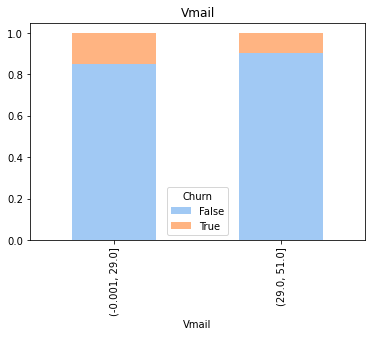

In [7]:
# Creating class intervals using pd.qcut
df1['Daycall']=pd.qcut(df['Total day calls'],7,duplicates='drop')
df1['Daycharge']=pd.qcut(df['Total day charge'],7,duplicates='drop')
df1['DayMin']=pd.qcut(df['Total day minutes'],7,duplicates='drop')
df1['Evecall']=pd.qcut(df['Total eve calls'],7,duplicates='drop')
df1['Evecharge']=pd.qcut(df['Total eve charge'],7,duplicates='drop')
df1['EveMin']=pd.qcut(df['Total eve minutes'],7,duplicates='drop')
df1['Nightcall']=pd.qcut(df['Total night calls'],7,duplicates='drop')
df1['Nightcharge']=pd.qcut(df['Total night charge'],7,duplicates='drop')
df1['NightMin']=pd.qcut(df['Total night minutes'],7,duplicates='drop')
df1['Intcall']=pd.qcut(df['Total intl calls'],7,duplicates='drop')
df1['Intcharge']=pd.qcut(df['Total intl charge'],7,duplicates='drop')
df1['IntMin']=pd.qcut(df['Total intl minutes'],7,duplicates='drop')
df1['AccLen']=pd.qcut(df['Account length'],7,duplicates='drop')
df1['Vmail']=pd.qcut(df['Number vmail messages'],7,duplicates='drop')
df1['CustCall']=pd.qcut(df['Customer service calls'],7,duplicates='drop')


df1.drop(['Number vmail messages','Account length','Total intl minutes','Total intl charge','Total intl calls',
          'Total night minutes','Total night charge','Total night calls',
          'Total eve minutes','Total eve charge','Total eve calls',
          'Total day minutes','Total day charge','Total day calls','Account length'
          ,'Number vmail messages','Customer service calls'],1,inplace=True)


var1=['Daycall','Daycharge','DayMin','Evecall','Evecharge','EveMin','Nightcall','Nightcharge','NightMin','Intcall','Intcharge','IntMin','AccLen','Vmail']
for i in var1:
    sns.countplot(df2[i],palette=color)
    plt.title(i)
    plt.show()

var2=['Total Minutes','Total Calls','Total Charge']
for i in var2:
    sns.countplot(df2[i],palette=color)
    plt.title(i)
    plt.show()



#Bivariate

corr=df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr,annot=True, cmap='YlGnBu')
plt.title("Correlation matrix")
plt.show()

var=['State','Area code','International plan','Voice mail plan','Customer service calls']
for i in var:
    if(df[i].nunique()>10):
        plt.figure(figsize=(25,8))
        bi=pd.crosstab(df[i],df['Churn'],normalize=True)
        bi.div(bi.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,color=color)
        plt.title(i)
        plt.show()
 
    else:
        plt.figure(figsize=(10,8))
        bi=pd.crosstab(df[i],df['Churn'],normalize=True)
        bi.div(bi.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,color=color)
        plt.title(i)
        plt.show()

        
for i in var1:
    if(df1[i].nunique()>10):
        plt.figure(figsize=(30,8))
        bi=pd.crosstab(df1[i],df1['Churn'],normalize=True)
        bi.div(bi.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,color=color)
        plt.title(i)
        plt.show()

    else:
        plt.figure(figsize=(10,8))
        bi=pd.crosstab(df1[i],df1['Churn'],normalize=True)
        bi.div(bi.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,color=color)
        plt.title(i)
        plt.show()

### Model Building | Feature Selection using WOE and IV

In [8]:
### WOE and IV 
# To know about the impact per variable
feature=df1.drop(['Churn','DayMin','EveMin','NightMin','IntMin'],1).columns
target='Churn'
df_iv=pd.DataFrame()
variable=[]
iv=[]

for i in feature:
    df_woe_iv=(pd.crosstab(df1[i],df1[target],normalize='columns')
               .assign(woe=lambda dfx:np.log(dfx[1]/dfx[0]))
               .assign(iv=lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    
    
    variable.append(i)

    iv.append(df_woe_iv.iv.unique())
    
df_iv['Feature']=variable

df_iv['IV']=iv    

### Model Building| Logistic Regression, Decision Tree, Random Forest

In [9]:
### Model building based on values where IV> 0.02
indep=df_iv[df_iv['IV']>0.02]
X=df1[indep.Feature.unique()]
y=df1.Churn

# Creating Dummies
X=pd.get_dummies(X,drop_first=True)

# Splitting the data set in 2 parts
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train,y_cv=train_test_split(X,y,test_size=0.25)

#####Fitting the model
## LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0,class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2',
                   random_state=1, solver='liblinear',tol=0.0001,verbose=0,warm_start=False)


#Testing/Predicting the Churn for Validation set and calculating it's accuracy
pred_cv=model.predict(x_cv)
acc_sc_LR=accuracy_score(y_cv,pred_cv)

#Cross validation score
from sklearn.model_selection import cross_val_score
cv_LR=cross_val_score(model,X,y,cv=5).mean()

##DECISION TREE

#Fitting the model
from sklearn import tree


model1=tree.DecisionTreeClassifier(random_state=1)
model1.fit(x_train,y_train)

#Testing/Predicting the Churn for Validation set and calculating it's accuracy
pred_cv_DT=model1.predict(x_cv)
acc_sc_DT=accuracy_score(y_cv,pred_cv_DT)


#Cross validation score
from sklearn.model_selection import cross_val_score
cv_DT=cross_val_score(model1,X,y).mean()


imp1=pd.Series(model1.feature_importances_, index=X.columns).sort_values(ascending=True)


## RANDOM FOREST

#Fitting the model
from sklearn.ensemble import RandomForestClassifier


model2=RandomForestClassifier(random_state=1,max_depth=10)
model2.fit(x_train,y_train)

#Testing/Predicting the Churn for Validation set and calculating it's accuracy
pred_cv_RF=model2.predict(x_cv)
acc_sc_RF=accuracy_score(y_cv,pred_cv_RF)


#Cross validation score
from sklearn.model_selection import cross_val_score
cv_RF=cross_val_score(model2,X,y).mean()

imp2=pd.Series(model2.feature_importances_, index=X.columns).sort_values(ascending=True)

### Model Building| Feature Engineering

In [10]:
################# Feature Engineering ####################

df1['Total charge']=df['Total day charge']+df['Total eve charge']+df['Total night charge']
df1['Total Min']=df['Total day minutes']+df['Total eve minutes']+df['Total night minutes']

df1['Totcharge']=pd.qcut(df1['Total charge'],7,duplicates='drop')
df1['TotMin']=pd.qcut(df1['Total Min'],7,duplicates='drop')

df1.drop(['Daycall','Daycharge','DayMin','Evecall','Evecharge','EveMin','Nightcall','Nightcharge','NightMin','Total charge','Total Min'],1,inplace=True)

feature=df1.drop(['Churn','TotMin'],1).columns
target='Churn'
df_iv1=pd.DataFrame()
variable1=[]
iv1=[]
#woe=[]
for i in feature:
    df_woe_iv1=(pd.crosstab(df1[i],df1[target],normalize='columns')
               .assign(woe=lambda dfx:np.log(dfx[1]/dfx[0]))
               .assign(iv=lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    
    
    variable1.append(i)
    #woe.append(df_woe_iv.woe)
    iv1.append(df_woe_iv1.iv.unique())
    
df_iv1['Feature']=variable1
#df_iv['WOE']=woe
df_iv1['IV']=iv1    

### Model building based on values where IV> 0.02
indep1=df_iv1[df_iv1['IV']>0.02]
X1=df1[indep1.Feature.unique()]
y1=df1.Churn

# Creating Dummies
X1=pd.get_dummies(X1,drop_first=True)

# Splitting the data set in 2 parts
from sklearn.model_selection import train_test_split
x1_train, x1_cv, y1_train,y1_cv=train_test_split(X1,y1,test_size=0.25)

#####Fitting the model
## LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model0=LogisticRegression()
model0.fit(x1_train,y1_train)

LogisticRegression(C=1.0,class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2',
                   random_state=1, solver='liblinear',tol=0.0001,verbose=0,warm_start=False)

#Testing/Predicting the Churn for Validation set and calculating it's accuracy
pred_cv0=model0.predict(x1_cv)
acc_sc_LR1=accuracy_score(y1_cv,pred_cv0)

#Cross validation score
from sklearn.model_selection import cross_val_score
cv_LR1=cross_val_score(model0,X1,y1,cv=5).mean()

##DECISION TREE

#Fitting the model
from sklearn import tree

model11=tree.DecisionTreeClassifier(random_state=1)
model11.fit(x1_train,y1_train)

#Testing/Predicting the Churn for Validation set and calculating it's accuracy
pred_cv_DT1=model11.predict(x1_cv)
acc_sc_DT1=accuracy_score(y1_cv,pred_cv_DT1)


#Cross validation score
from sklearn.model_selection import cross_val_score
cv_DT1=cross_val_score(model11,X1,y1).mean()

imp12=pd.Series(model11.feature_importances_, index=X1.columns).sort_values(ascending=True)
## RANDOM FOREST

#Fitting the model
from sklearn.ensemble import RandomForestClassifier

model21=RandomForestClassifier(random_state=1,max_depth=10)
model21.fit(x1_train,y1_train)

#Testing/Predicting the Churn for Validation set and calculating it's accuracy
pred_cv_RF1=model21.predict(x1_cv)
acc_sc_RF1=accuracy_score(y1_cv,pred_cv_RF1)


#Cross validation score
from sklearn.model_selection import cross_val_score
cv_RF1=cross_val_score(model21,X1,y1).mean()

imp22=pd.Series(model21.feature_importances_, index=X1.columns).sort_values(ascending=True)

### Model Evaluation and Important Features

Decision Tree with feature engineering
Training Accuracy: 0.9028776978417267
Cross validated Accuracy: 0.9021831426629028


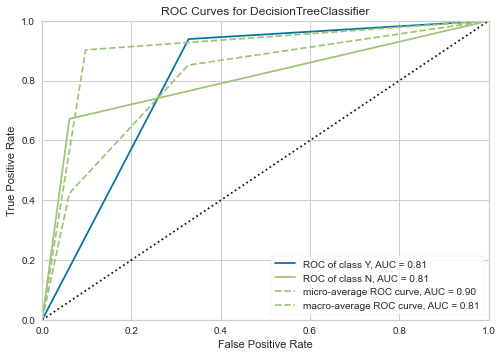

[[677  44]
 [ 37  76]]
              precision    recall  f1-score   support

       False       0.95      0.94      0.94       721
        True       0.63      0.67      0.65       113

    accuracy                           0.90       834
   macro avg       0.79      0.81      0.80       834
weighted avg       0.91      0.90      0.90       834



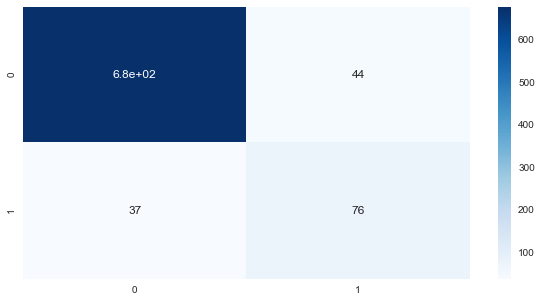

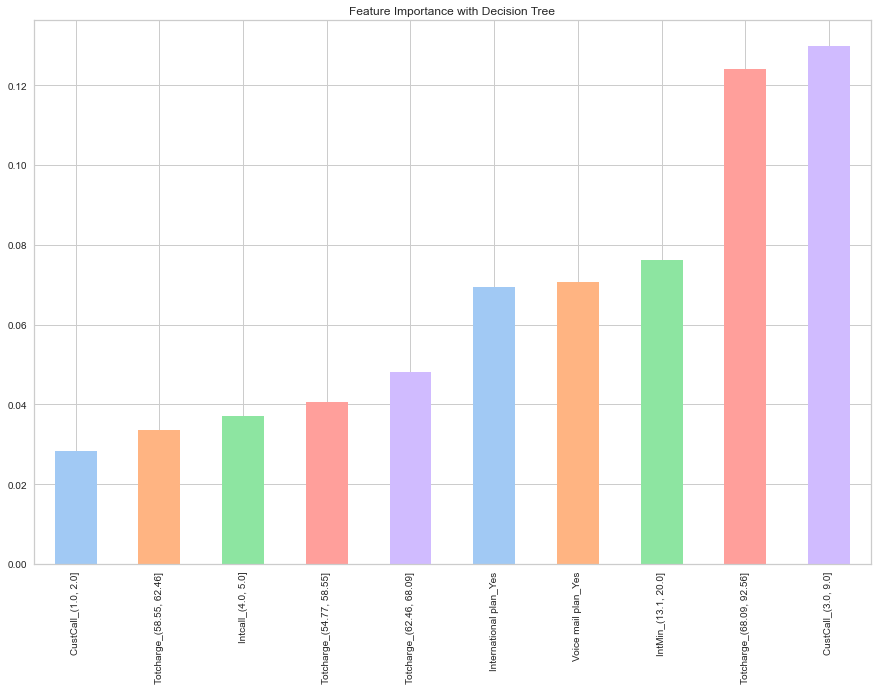

In [11]:
########## Finding the best model #############
best=max(cv_LR,cv_DT,cv_RF,cv_LR1,cv_DT1,cv_RF1)

if(best==cv_LR):
    print("Logistic Regression")
    print("Training Accuracy:",acc_sc_LR)
    print("Cross validated Accuracy:",cv_LR)
    # Instantiate the visualizer with the classification model
    from yellowbrick.classifier import ROCAUC
    visualizer = ROCAUC(model, classes=["Y", "N"])
    
    visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
    visualizer.score(x_cv, y_cv)        # Evaluate the model on the test data
    visualizer.show()                       # Finalize and show the figure
    
    from sklearn.metrics import confusion_matrix,classification_report
    cm=confusion_matrix(y_cv,pred_cv)
    print(cm)
    print(classification_report(y_cv,pred_cv))
    plt.figure(figsize=(10,5))
    sns.heatmap(cm,cmap='Blues',annot=True)
    
    
elif(best==cv_LR1):
    print("Logistic Regression with feature engineering")
    print("Training Accuracy:",acc_sc_LR1)
    print("Cross validated Accuracy:",cv_LR1)
    # Instantiate the visualizer with the classification model
    from yellowbrick.classifier import ROCAUC
    visualizer = ROCAUC(model0, classes=["Y", "N"])
    
    visualizer.fit(x1_train, y1_train)        # Fit the training data to the visualizer
    visualizer.score(x1_cv, y1_cv)        # Evaluate the model on the test data
    visualizer.show()                       # Finalize and show the figure
    
    from sklearn.metrics import confusion_matrix,classification_report
    cm=confusion_matrix(y1_cv,pred_cv0)
    print(cm)
    print(classification_report(y1_cv,pred_cv0))
    plt.figure(figsize=(10,5))
    sns.heatmap(cm,cmap='Blues',annot=True)
    
elif(best==cv_DT):
    print("Decision Tree ")
    print("Training Accuracy:",acc_sc_DT)
    print("Cross validated Accuracy:",cv_DT)
    # Instantiate the visualizer with the classification model
    from yellowbrick.classifier import ROCAUC
    visualizer = ROCAUC(model1, classes=["Y", "N"])
    
    visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
    visualizer.score(x_cv, y_cv)        # Evaluate the model on the test data
    visualizer.show()                       # Finalize and show the figure
    
    from sklearn.metrics import confusion_matrix,classification_report
    cm=confusion_matrix(y_cv,pred_cv_DT)
    print(cm)
    print(classification_report(y_cv,pred_cv_DT))
    plt.figure(figsize=(10,5))
    sns.heatmap(cm,cmap='Blues',annot=True)
    plt.show()
    
    imp1.tail(10).plot(kind='bar',figsize=(15,10),color=color)
    plt.title("Feature Importance with Decision Tree") 
    plt.show()

elif(best==cv_DT1):
    print("Decision Tree with feature engineering")
    print("Training Accuracy:",acc_sc_DT1)
    print("Cross validated Accuracy:",cv_DT1)
    # Instantiate the visualizer with the classification model
    from yellowbrick.classifier import ROCAUC
    visualizer = ROCAUC(model11, classes=["Y", "N"])
    
    visualizer.fit(x1_train, y1_train)        # Fit the training data to the visualizer
    visualizer.score(x1_cv, y1_cv)        # Evaluate the model on the test data
    visualizer.show()                       # Finalize and show the figure
    
    from sklearn.metrics import confusion_matrix,classification_report
    cm=confusion_matrix(y1_cv,pred_cv_DT1)
    print(cm)
    print(classification_report(y1_cv,pred_cv_DT1))
    plt.figure(figsize=(10,5))
    sns.heatmap(cm,cmap='Blues',annot=True)
    plt.show()
    
    imp12.tail(10).plot(kind='bar',figsize=(15,10),color=color)
    plt.title("Feature Importance with Decision Tree") 
    plt.show()

elif(best==cv_RF1):
    print("Random Forest with feature engineering")
    print("Training Accuracy:",acc_sc_RF1)
    print("Cross validated Accuracy:",cv_RF1)
    # Instantiate the visualizer with the classification model
    from yellowbrick.classifier import ROCAUC
    visualizer = ROCAUC(model21, classes=["Y", "N"])
    
    visualizer.fit(x1_train, y1_train)        # Fit the training data to the visualizer
    visualizer.score(x1_cv, y1_cv)        # Evaluate the model on the test data
    visualizer.show()                       # Finalize and show the figure
    
    from sklearn.metrics import confusion_matrix,classification_report
    cm=confusion_matrix(y1_cv,pred_cv_RF1)
    print(cm)
    print(classification_report(y1_cv,pred_cv_RF1))
    plt.figure(figsize=(10,5))
    sns.heatmap(cm,cmap='Blues',annot=True)
    plt.show()
    
    imp22.tail(10).plot(kind='bar',figsize=(15,10))
    plt.title("Feature Importance with Random Forest") 
    plt.show()
else:
    print("Random Forest")
    print("Training Accuracy:",acc_sc_RF)
    print("Cross validated Accuracy:",cv_RF)
    # Instantiate the visualizer with the classification model
    from yellowbrick.classifier import ROCAUC
    visualizer = ROCAUC(model2, classes=["Y", "N"])
    
    visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
    visualizer.score(x_cv, y_cv)        # Evaluate the model on the test data
    visualizer.show()                       # Finalize and show the figure
    
    from sklearn.metrics import confusion_matrix,classification_report
    cm=confusion_matrix(y_cv,pred_cv_RF)
    print(cm)
    print(classification_report(y_cv,pred_cv_RF))
    plt.figure(figsize=(10,5))
    sns.heatmap(cm,cmap='Blues',annot=True)
    plt.show()
    
    imp2.tail(10).plot(kind='bar',figsize=(15,10))
    plt.title("Feature Importance with Random Forest") 
    plt.show()

### Strategies
- Since Total Charge (high) has maximum importance in predicting the churn, reducing the call rates might help in arresting it.
- Customer Care services should be improved in order to prevent switching the company.
- Those who have Voice mail plan and International should be given better services to keep them from leaving.
- International Charges should perhaps be reduced to keep people from leaving.
